In [90]:
import Pkg
Pkg.add(["CSV","Statistics","StatsBase","Plots","StatsPlots","KernelDensity","MLBase","HypothesisTests","DataFrames","DecisionTree","MLDataUtils","MLJ"]) 

   Resolving package versions...
  No Changes to `C:\Users\bkork\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\bkork\.julia\environments\v1.9\Manifest.toml`
Precompiling project...
  ✓ BangBang → BangBangDataFramesExt
  ✓ Transducers → TransducersDataFramesExt
  ✓ StatisticalMeasures
  ✓ StatisticalMeasures → ScientificTypesExt
  ✓ MLJBase → DefaultMeasuresExt
  ✓ MLJ
  6 dependencies successfully precompiled in 90 seconds. 316 already precompiled. 1 skipped during auto due to previous errors.


In [57]:
using CSV, Statistics, StatsBase, Plots, StatsPlots, KernelDensity, MLBase, HypothesisTests, DataFrames

In [58]:
using DataFrames


# CSV dosyasını oku
df = DataFrame(CSV.File("yenitemiz_data.csv"))

2187×31 DataFrame
  Row │ VoteCount  Rating   Title                    Season_Count  Episode_Cou ⋯
      │ Float64    Float64  String                   Int64         Int64       ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     105.0  7.2      Adalett                             1              ⋯
    2 │      12.0  4.5      %100 Futbol                         1
    3 │     454.0  7.7      1 Erkek 1 Kadin 2 Cocuk             1
    4 │    5700.0  7.8      1 Kadın 1 Erkek                     8            4
    5 │    2200.0  7.8      10 Bin Adim                         2              ⋯
    6 │      70.0  8.0      103 Gol                             1
    7 │       0.0  5.66768  12 Eylül 1980 Darbe                 1
    8 │       0.0  5.66768  15 Dakika                           1
    9 │      12.0  3.4      2.Sayfa                             5            4 ⋯
   10 │    3000.0  7.6      20 Dakika                           1
   11 │       0.0  5.66768  2010-2011 TFF Lig                   2
  ⋮   │     ⋮         ⋮                ⋮                  ⋮              ⋮     ⋱
 2178 │      66.0  3.1      İnadına Yaşamak                     1
 2179 │     191.0  6.4      İnsanlar Alemi                      1              ⋯
 2180 │    1800.0  5.9      İntikam                             1
 2181 │    2700.0  7.1      İstanbullu Gelin                    1
 2182 │      16.0  2.6      İyi Uçuşlar                         2
 2183 │    9600.0  1.2      İşte Bu Benim Masalım               1              ⋯
 2184 │     541.0  5.6      Şahane Damat                        1
 2185 │    6700.0  5.2      Şahmaran                            1
 2186 │   46000.0  9.0      Şahsiyet                            3            1
 2187 │       0.0  5.66768  Şehirler ve Yüzler                  2              ⋯
                                                27 columns and 2166 rows omitted

In [59]:
CSV.write("yenitemiz_data.csv", df)

"yenitemiz_data.csv"

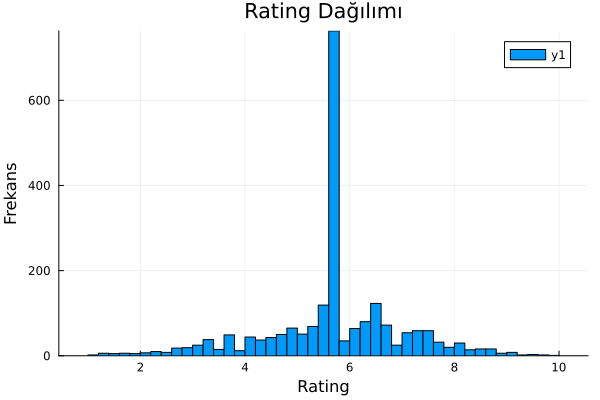

In [60]:
# Sayısal değişkenlerin dağılımlarını gösteren histogramlar
plot_histograms = histogram(df[:, :Rating], xlabel="Rating", ylabel="Frekans", title="Rating Dağılımı")


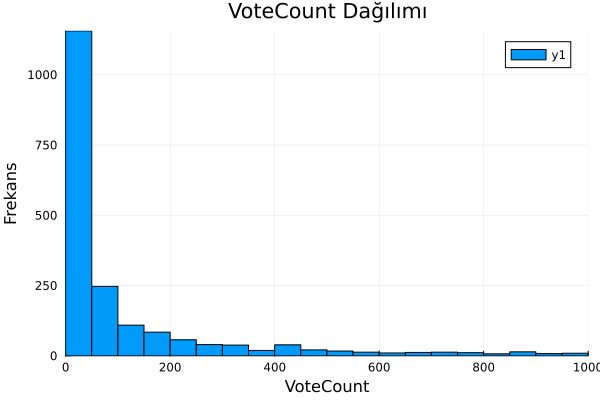

In [61]:

plot_histograms = histogram(df[:, :VoteCount], xlabel="VoteCount", ylabel="Frekans", title="VoteCount Dağılımı", xlim=(0,1000))
# Diğer sayısal değişkenler için benzer şekilde devam edebilirsiniz.


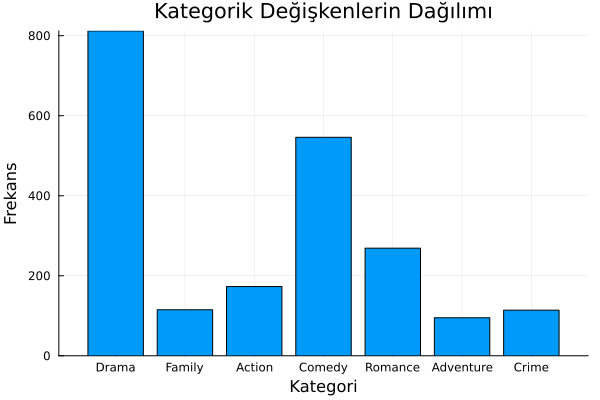

In [62]:
# Değişken isimleri]
categories = [ "Drama","Family","Action","Comedy","Romance", "Adventure","Crime"]

# Frekanslar
frequencies = [sum(df[:, :cat_drama]), sum(df[:, :cat_family]), sum(df[:, :cat_action]), sum(df[:, :cat_comedy]), sum(df[:, :cat_romance]), sum(df[:, :cat_adventure]), sum(df[:, :cat_crime])]

# Bar grafiğini oluştur
plot_bar = bar(categories, frequencies,
               xlabel="Kategori", ylabel="Frekans", title="Kategorik Değişkenlerin Dağılımı",
               legend=false)



# Bağımlı değişkenlerimizi sezon sayısına göre yeni sütun oluşturuyoruz :
A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)


B.	Sadece iki sezon mu devam edecek? (Kısmen Başarılı)


C.	Üç sezon ile beş sezon arasında mı sonlanacak? (Başarılı)


D.	Beş sezon ile on sezon arasında mı sonlanacak? (Kısmen Olgun)


E.	On sezon veya daha uzun süre devam edecek mi? (Olgun)

In [63]:
# Sınıflandırmayı gerçekleştirin
df.Classification .= [
    typeof(year) === Int && season_count == 1 ? "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)" :
    season_count == 2 ? "B. Sadece iki sezon mu devam edecek? (Kısmen Başarılı)" :
    3 <= season_count <= 5 ? "C. Üç sezon ile beş sezon arasında mı sonlanacak? (Başarılı)" :
    5 < season_count <= 10 ? "D. Beş sezon ile on sezon arasında mı sonlanacak? (Kısmen Olgun)" :
    season_count > 10 ? "E. On sezon veya daha uzun süre devam edecek mi? (Olgun)" : "" for (year, season_count) in zip(df.IsEnded, df.Season_Count)
]


2187-element Vector{String}:
 "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)"
 "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)"
 "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)"
 "D. Beş sezon ile on sezon arasında mı sonlanacak? (Kısmen Olgun)"
 "B. Sadece iki sezon mu devam edecek? (Kısmen Başarılı)"
 "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)"
 "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)"
 "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)"
 "C. Üç sezon ile beş sezon arasında mı sonlanacak? (Başarılı)"
 "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)"
 "B. Sadece iki sezon mu devam edecek? (Kısmen Başarılı)"
 "B. Sadece iki sezon mu devam edecek? (Kısmen Başarılı)"
 "B. Sadece iki sezon mu devam edecek? (Kısmen Başarılı)"
 ⋮
 "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)"
 "B. Sadece iki sezon mu devam edecek? (Kısmen Başarılı)"
 "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)"
 "A. B

In [64]:
# Yeni bir sütun ekleyin ve başlangıçta boş bir dizi oluşturun
df.Classification_Int = Vector{Int64}(undef, size(df, 1))

# Her bir sınıflandırmayı integer bir değere dönüştür
for i in 1:size(df, 1)
    classification_str = df.Classification[i]

    df.Classification_Int[i] = 
        classification_str == "A. Birinci sezonda yayından kaldırılacak mı? (Başarısız)" ? 1 :
        classification_str == "B. Sadece iki sezon mu devam edecek? (Kısmen Başarılı)" ? 2 :
        classification_str == "C. Üç sezon ile beş sezon arasında mı sonlanacak? (Başarılı)" ? 3 :
        classification_str == "D. Beş sezon ile on sezon arasında mı sonlanacak? (Kısmen Olgun)" ? 4 :
        classification_str == "E. On sezon veya daha uzun süre devam edecek mi? (Olgun)" ? 5 :
        0  # Eğer sınıflandırma mevcut değilse veya hatalıysa 0 olarak işaretle
end


In [65]:
first(df, 14)

14×32 DataFrame
 Row │ VoteCount  Rating   Title                    Season_Count  Episode_Coun ⋯
     │ Float64    Float64  String                   Int64         Int64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     105.0  7.2      Adalett                             1             1 ⋯
   2 │      12.0  4.5      %100 Futbol                         1
   3 │     454.0  7.7      1 Erkek 1 Kadin 2 Cocuk             1             3
   4 │    5700.0  7.8      1 Kadın 1 Erkek                     8            43
   5 │    2200.0  7.8      10 Bin Adim                         2             2 ⋯
   6 │      70.0  8.0      103 Gol                             1
   7 │       0.0  5.66768  12 Eylül 1980 Darbe                 1
   8 │       0.0  5.66768  15 Dakika                           1
   9 │      12.0  3.4      2.Sayfa                             5            46 ⋯
  10 │    3000.0  7.6      20 Dakika                           1             2
  11 │       0.0  5.66768  2010-2011 TFF Lig                   2             3
  12 │       0.0  5.66768  2011-2012 TFF Lig                   2             3
  13 │      33.0  6.6      2012-2013 Süper Lig                 2             1 ⋯
  14 │      33.0  6.5      2013-2014 Süper Lig                 1             2
                                                              28 columns omitted

In [66]:
# String olan Classification sütununu int'e çevirdiğimizden artık Classification sütununu siliyoruz
column_to_remove = :"Classification"

# DataFrame'den sütunu sil
select!(df, Not(column_to_remove))

2187×31 DataFrame
  Row │ VoteCount  Rating   Title                    Season_Count  Episode_Cou ⋯
      │ Float64    Float64  String                   Int64         Int64       ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     105.0  7.2      Adalett                             1              ⋯
    2 │      12.0  4.5      %100 Futbol                         1
    3 │     454.0  7.7      1 Erkek 1 Kadin 2 Cocuk             1
    4 │    5700.0  7.8      1 Kadın 1 Erkek                     8            4
    5 │    2200.0  7.8      10 Bin Adim                         2              ⋯
    6 │      70.0  8.0      103 Gol                             1
    7 │       0.0  5.66768  12 Eylül 1980 Darbe                 1
    8 │       0.0  5.66768  15 Dakika                           1
    9 │      12.0  3.4      2.Sayfa                             5            4 ⋯
   10 │    3000.0  7.6      20 Dakika                           1
   11 │       0.0  5.66768  2010-2011 TFF Lig                   2
  ⋮   │     ⋮         ⋮                ⋮                  ⋮              ⋮     ⋱
 2178 │      66.0  3.1      İnadına Yaşamak                     1
 2179 │     191.0  6.4      İnsanlar Alemi                      1              ⋯
 2180 │    1800.0  5.9      İntikam                             1
 2181 │    2700.0  7.1      İstanbullu Gelin                    1
 2182 │      16.0  2.6      İyi Uçuşlar                         2
 2183 │    9600.0  1.2      İşte Bu Benim Masalım               1              ⋯
 2184 │     541.0  5.6      Şahane Damat                        1
 2185 │    6700.0  5.2      Şahmaran                            1
 2186 │   46000.0  9.0      Şahsiyet                            3            1
 2187 │       0.0  5.66768  Şehirler ve Yüzler                  2              ⋯
                                                27 columns and 2166 rows omitted

### Sampling veri setinin yüzde 75 i Train, yüzde 15 i Validation, Yüzde 10 u Test

In [67]:
using Random
using DataFrames

# Orijinal DataFrame'i kopyalayalım
df_copy = copy(df)
select!(df_copy, Not("Season_Count", "Actors", "IsEnded"))

# Veri setini karıştıralım
shuffled_indices = shuffle(1:size(df_copy, 1))
df_shuffled = df_copy[shuffled_indices, :]

# Release_Year 1998-2023 aralığındaki verileri filtrele
df_filtered = filter(row -> 1998 ≤ row.Release_Year ≤ 2023, df_shuffled)

# Train, validation ve test setlerini oluştur
train_size = Int(floor(0.75 * size(df_filtered, 1)))
validation_size = Int(floor(0.15 * size(df_filtered, 1)))
test_size = size(df_filtered, 1) - train_size - validation_size

train_set = df_filtered[1:train_size, :]
validation_set = df_filtered[train_size+1:train_size+validation_size, :]
test_set = df_filtered[train_size+validation_size+1:end, :]


219×28 DataFrame
 Row │ VoteCount  Rating   Title                      Episode_Count  cat_drama ⋯
     │ Float64    Float64  String                     Int64          Int64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │       0.0  5.66768  Hayata Beş Kala                       11          1 ⋯
   2 │     181.0  1.7      Survivor Exxen Cup                    32          1
   3 │       0.0  5.66768  Mahser: Nabucco'nun Zehri              1          0
   4 │      21.0  6.5      Halil Ibrahim Sofrasi                 26          1
   5 │       0.0  5.66768  Aglatan Dans                          13          1 ⋯
   6 │      18.0  6.8      Küçük Seyler                           9          1
   7 │      18.0  3.9      Besibiryerde                           9          1
   8 │       0.0  5.66768  Yemek Bahane                           8          1
   9 │       0.0  5.66768  Al Sana Haber                         19          0 ⋯
  10 │     194.0  7.7      Makina Kafa                           28          1
  11 │      57.0  5.5      Kalbim Ege'de Kaldi                   26          1
  ⋮  │     ⋮         ⋮                 ⋮                    ⋮            ⋮     ⋱
 210 │      15.0  6.9      Ucuz Hayatlar                         32          0
 211 │       0.0  5.66768  Balik Dedektifi                       19          0 ⋯
 212 │      71.0  5.4      Deneme Çekimi                         26          0
 213 │       6.0  9.5      Bir Tugan                              6          0
 214 │      52.0  4.0      Yemekteyiz                            26          0
 215 │     305.0  4.6      Kader Baglari                         26          1 ⋯
 216 │      77.0  5.3      Affedilmeyen                           1          0
 217 │      17.0  6.4      Adal                                   2          0
 218 │      97.0  3.5      Ikizler Memo-Can                      98          0
 219 │    4700.0  7.5      Aynen Aynen                           26          1 ⋯
                                                 23 columns and 198 rows omitted

In [68]:
# String olan Classification sütununu int'e çevirdiğimizden artık Classification sütununu siliyoruz
column_to_remove = :"Classification_Int"

# DataFrame'den sütunu sil
select!(test_set, Not(column_to_remove))

219×27 DataFrame
 Row │ VoteCount  Rating   Title                      Episode_Count  cat_drama ⋯
     │ Float64    Float64  String                     Int64          Int64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │       0.0  5.66768  Hayata Beş Kala                       11          1 ⋯
   2 │     181.0  1.7      Survivor Exxen Cup                    32          1
   3 │       0.0  5.66768  Mahser: Nabucco'nun Zehri              1          0
   4 │      21.0  6.5      Halil Ibrahim Sofrasi                 26          1
   5 │       0.0  5.66768  Aglatan Dans                          13          1 ⋯
   6 │      18.0  6.8      Küçük Seyler                           9          1
   7 │      18.0  3.9      Besibiryerde                           9          1
   8 │       0.0  5.66768  Yemek Bahane                           8          1
   9 │       0.0  5.66768  Al Sana Haber                         19          0 ⋯
  10 │     194.0  7.7      Makina Kafa                           28          1
  11 │      57.0  5.5      Kalbim Ege'de Kaldi                   26          1
  ⋮  │     ⋮         ⋮                 ⋮                    ⋮            ⋮     ⋱
 210 │      15.0  6.9      Ucuz Hayatlar                         32          0
 211 │       0.0  5.66768  Balik Dedektifi                       19          0 ⋯
 212 │      71.0  5.4      Deneme Çekimi                         26          0
 213 │       6.0  9.5      Bir Tugan                              6          0
 214 │      52.0  4.0      Yemekteyiz                            26          0
 215 │     305.0  4.6      Kader Baglari                         26          1 ⋯
 216 │      77.0  5.3      Affedilmeyen                           1          0
 217 │      17.0  6.4      Adal                                   2          0
 218 │      97.0  3.5      Ikizler Memo-Can                      98          0
 219 │    4700.0  7.5      Aynen Aynen                           26          1 ⋯
                                                 22 columns and 198 rows omitted

In [69]:
CSV.write("test_data.csv", test_set)

"test_data.csv"

In [70]:
CSV.write("train_data.csv", train_set)

"train_data.csv"

In [71]:
CSV.write("validation_data.csv", validation_set)

"validation_data.csv"

# Model Oluşturma
* Öncelikle yıllara göre ayrım gerçekleştirmeliyiz 

In [72]:
using Random
using DataFrames
using DecisionTree
#using MLDataUtils

# Veri setini yükleyin (df, df_copy, exclude_columns, test_set, train_set)

# Öznitelikleri ve hedef değişkeni belirleyin
features = select(train_set, Not(:Classification_Int, :Title))
target = train_set[:, :Classification_Int]

start_year = 1998
end_year = 2023

# Oluşturulan DataFrames'leri saklamak için sözlükler
train_sets = Dict()
test_sets = Dict()
val_sets = Dict()

# Train ve test setleri için döngü
for year = start_year:end_year
    train_set_name = Symbol("train_set_", year)
    test_set_name = Symbol("test_set_", year)
    val_set_name = Symbol("val_set_",year)
    
    train_sets[train_set_name] = filter(row -> row.Release_Year <= year, train_set)
    test_sets[test_set_name] = filter(row -> row.Release_Year == year, test_set)
    val_sets[val_set_name] = filter(row -> row.Release_Year == year, validation_set)
end



## Eğitim ve Validation Setinin modelimizde kullanıp performansını değerlendirelim

Eğitim seti doğruluğu (1998): 1.0
Validation seti doğruluğu (1998): 1.0
[2 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0]


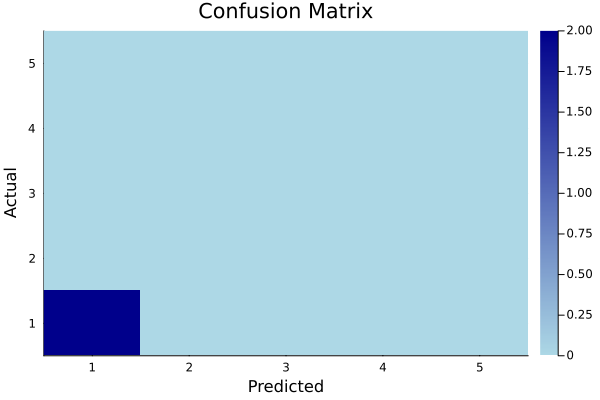

Eğitim seti doğruluğu (1999): 1.0
Validation seti doğruluğu (1999): 0.0
[0 0 0 0 0; 0 0 0 0 0; 0 1 0 0 0; 0 0 0 0 0; 0 0 0 0 0]


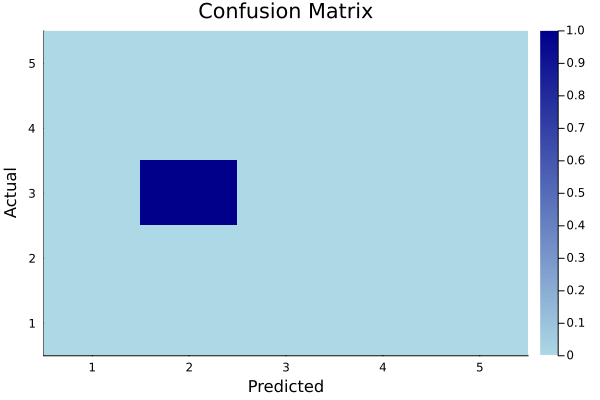

Eğitim seti doğruluğu (2000): 1.0
Validation seti doğruluğu (2000): 0.6666666666666666
[6 1 2 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0]


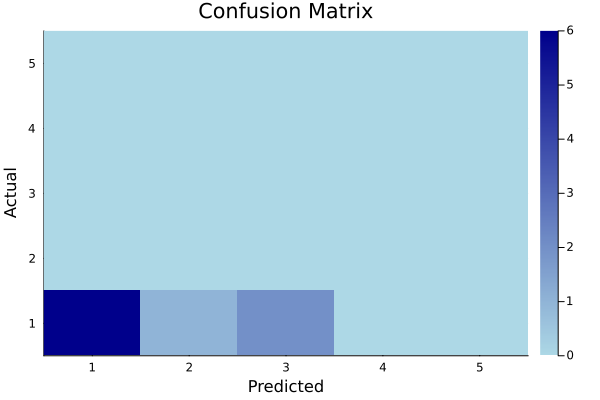

Eğitim seti doğruluğu (2001): 1.0
Validation seti doğruluğu (2001): 0.625
[5 1 0 0 0; 1 0 0 0 0; 0 1 0 0 0; 0 0 0 0 0; 0 0 0 0 0]


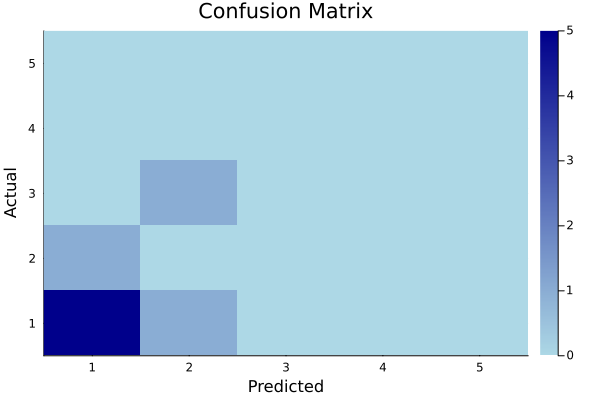

Eğitim seti doğruluğu (2002): 1.0
Validation seti doğruluğu (2002): 0.75
[3 0 0 0 0; 0 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0]


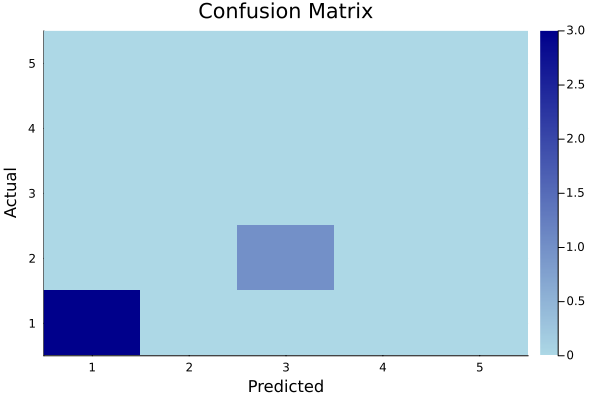

Eğitim seti doğruluğu (2003): 1.0
Validation seti doğruluğu (2003): 1.0
[3 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0]


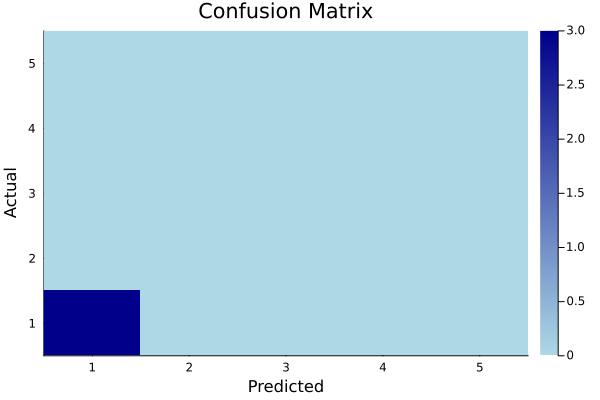

Eğitim seti doğruluğu (2004): 1.0
Validation seti doğruluğu (2004): 0.75
[5 1 1 0 0; 0 1 0 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0]


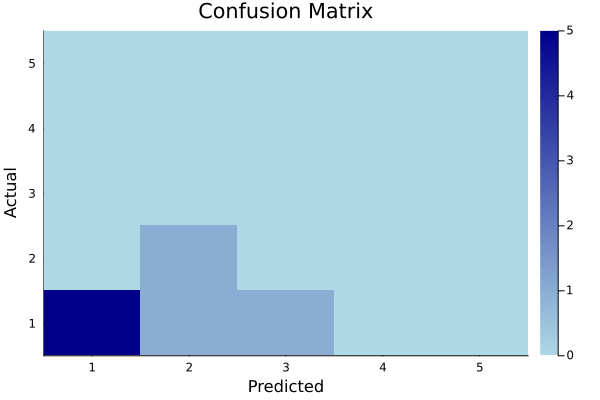

Eğitim seti doğruluğu (2005): 1.0
Validation seti doğruluğu (2005): 1.0
[7 0 0 0 0; 0 1 0 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0]


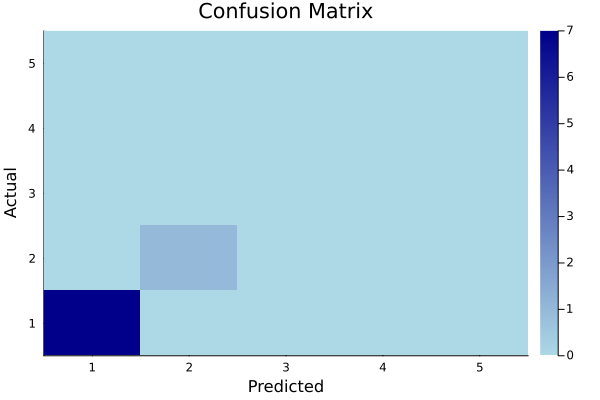

Eğitim seti doğruluğu (2006): 1.0
Validation seti doğruluğu (2006): 0.6666666666666666
[5 1 0 0 0; 4 3 0 0 0; 0 0 2 0 0; 0 0 0 0 0; 0 0 0 0 0]


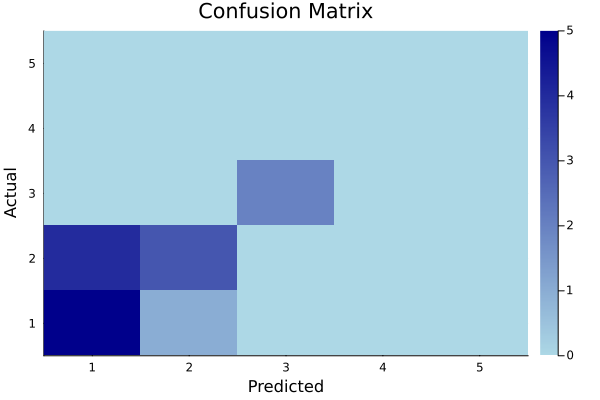

Eğitim seti doğruluğu (2007): 1.0
Validation seti doğruluğu (2007): 0.7142857142857143
[9 1 0 0 0; 2 1 0 0 0; 0 1 0 0 0; 0 0 0 0 0; 0 0 0 0 0]


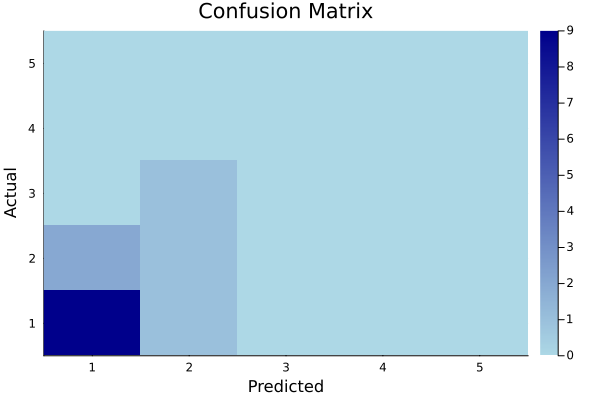

Eğitim seti doğruluğu (2008): 1.0
Validation seti doğruluğu (2008): 0.7333333333333333
[9 1 0 0 0; 2 1 0 1 0; 0 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0]


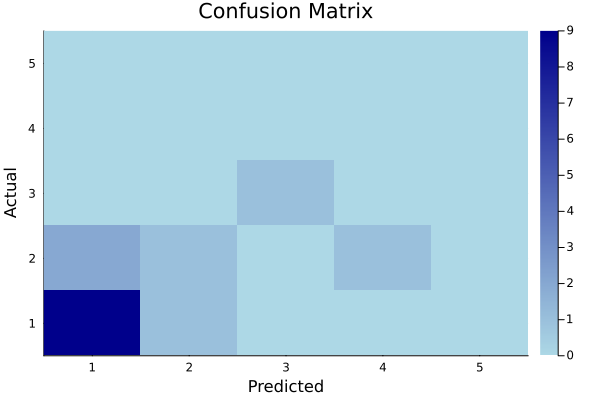

Eğitim seti doğruluğu (2009): 1.0
Validation seti doğruluğu (2009): 0.6
[5 1 0 0 0; 1 0 1 0 0; 0 1 1 0 0; 0 0 0 0 0; 0 0 0 0 0]


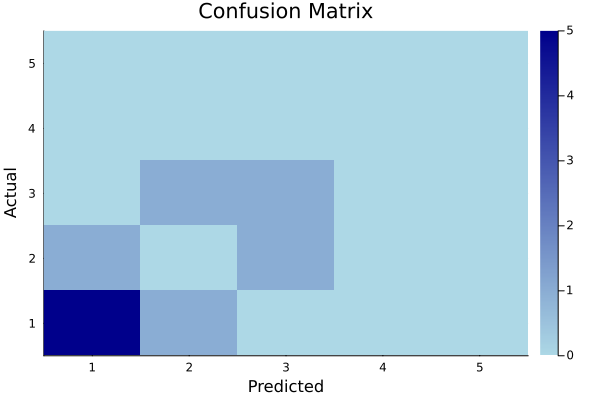

Eğitim seti doğruluğu (2010): 1.0
Validation seti doğruluğu (2010): 0.8
[6 0 0 0 0; 1 1 0 0 0; 0 0 1 0 0; 0 0 1 0 0; 0 0 0 0 0]


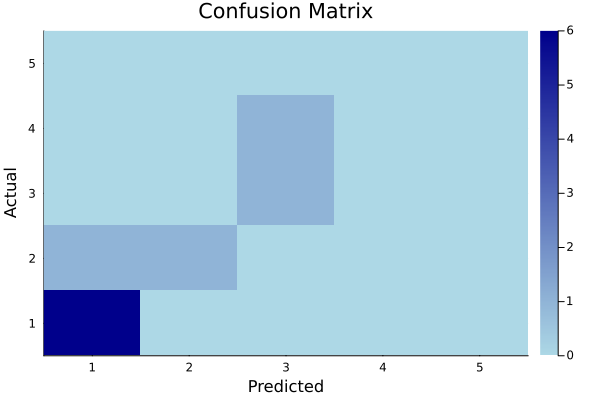

Eğitim seti doğruluğu (2011): 1.0
Validation seti doğruluğu (2011): 0.7857142857142857
[7 1 0 0 0; 1 2 0 0 0; 0 1 2 0 0; 0 0 0 0 0; 0 0 0 0 0]


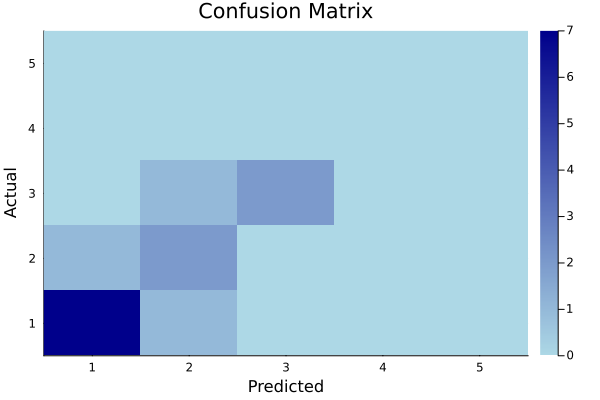

Eğitim seti doğruluğu (2012): 1.0
Validation seti doğruluğu (2012): 0.5714285714285714
[6 0 0 0 0; 1 1 0 3 0; 1 1 1 0 0; 0 0 0 0 0; 0 0 0 0 0]


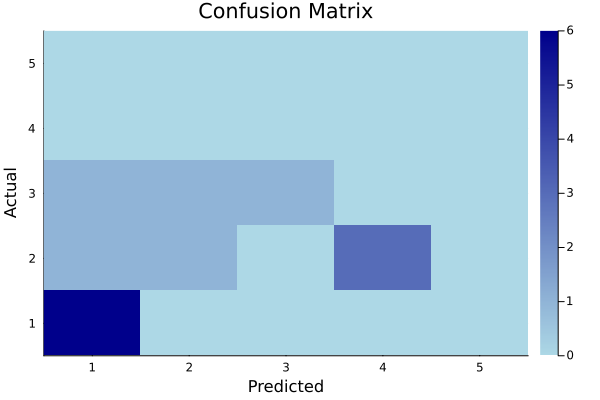

Eğitim seti doğruluğu (2013): 1.0
Validation seti doğruluğu (2013): 0.7619047619047619
[13 0 0 0 0; 1 2 0 1 0; 3 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0]


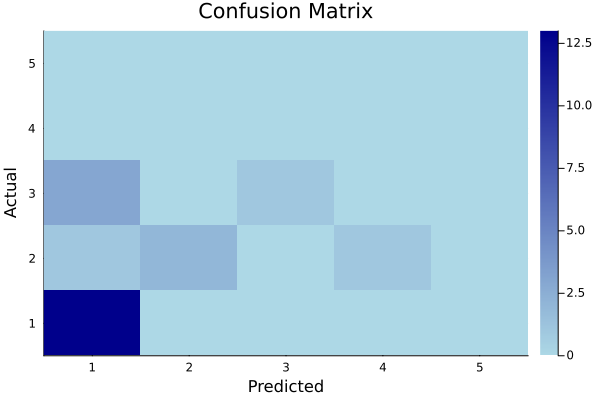

Eğitim seti doğruluğu (2014): 1.0
Validation seti doğruluğu (2014): 0.7368421052631579
[10 1 1 0 0; 1 3 0 0 0; 2 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0]


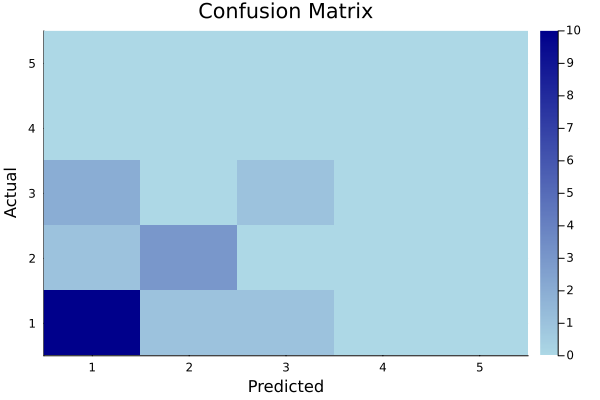

Eğitim seti doğruluğu (2015): 1.0
Validation seti doğruluğu (2015): 0.8
[10 0 0 0 0; 0 1 2 0 0; 0 1 1 0 0; 0 0 0 0 0; 0 0 0 0 0]


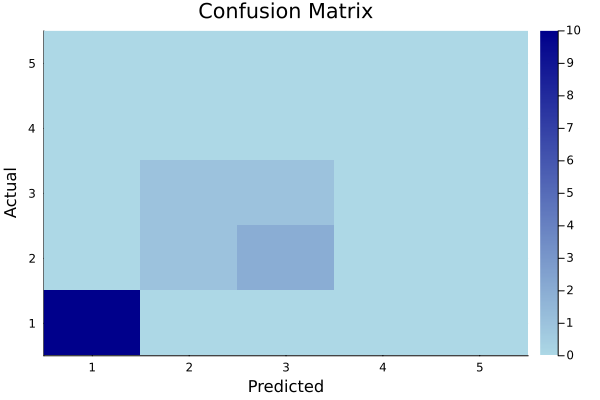

Eğitim seti doğruluğu (2016): 0.9989293361884368
Validation seti doğruluğu (2016): 1.0
[6 0 0 0 0; 0 1 0 0 0; 0 0 2 0 0; 0 0 0 0 0; 0 0 0 0 0]


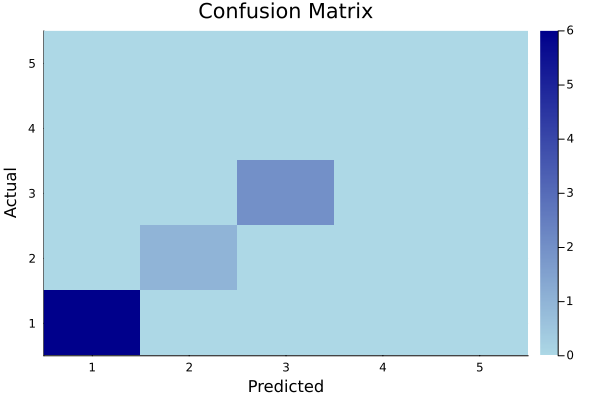

Eğitim seti doğruluğu (2017): 0.9990138067061144
Validation seti doğruluğu (2017): 0.9047619047619048
[13 0 0 0 0; 1 4 1 0 0; 0 0 2 0 0; 0 0 0 0 0; 0 0 0 0 0]


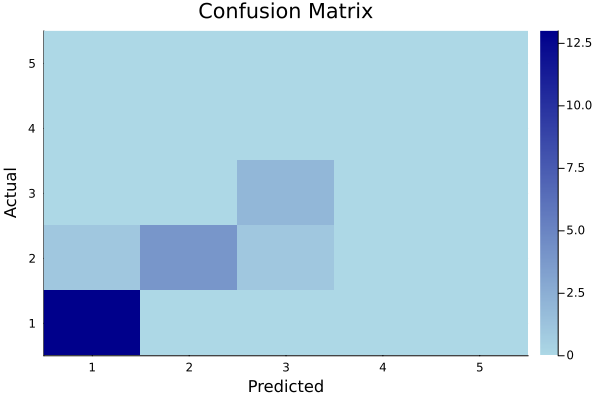

Eğitim seti doğruluğu (2018): 0.9990825688073395
Validation seti doğruluğu (2018): 0.8333333333333334
[12 1 1 0 0; 0 2 0 0 0; 0 0 1 0 0; 1 0 0 0 0; 0 0 0 0 0]


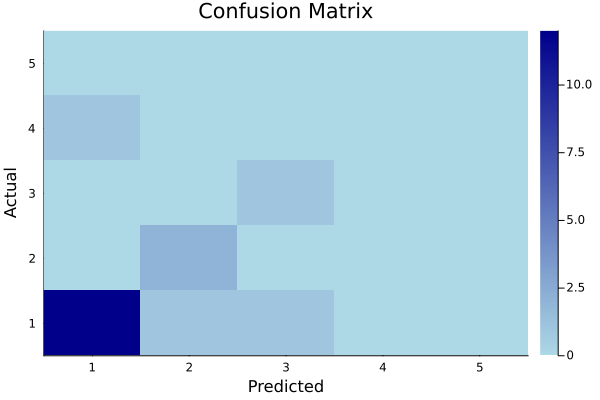

Eğitim seti doğruluğu (2019): 0.9991742361684558
Validation seti doğruluğu (2019): 0.9565217391304348
[17 1 0 0 0; 0 4 0 0 0; 0 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0]


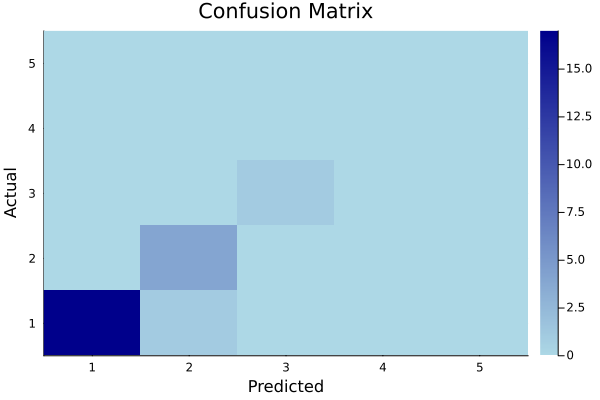

Eğitim seti doğruluğu (2020): 0.9992354740061162
Validation seti doğruluğu (2020): 0.8
[7 0 0 0 0; 1 0 0 0 0; 0 1 1 0 0; 0 0 0 0 0; 0 0 0 0 0]


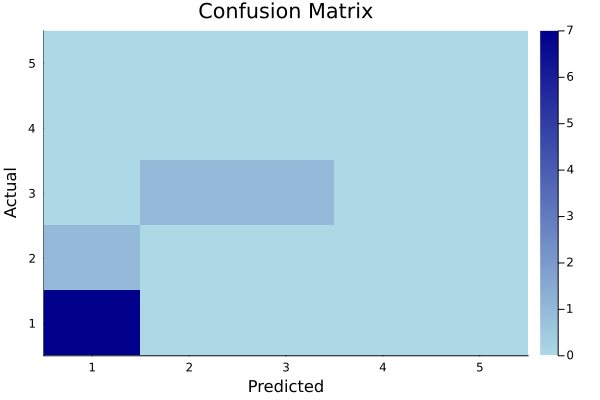

Eğitim seti doğruluğu (2021): 0.9993150684931507
Validation seti doğruluğu (2021): 0.7857142857142857
[17 4 0 0 0; 2 4 0 0 0; 0 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0]


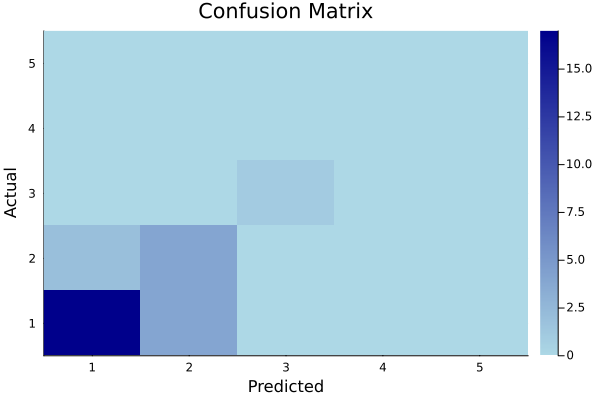

Eğitim seti doğruluğu (2022): 0.9993610223642172
Validation seti doğruluğu (2022): 0.75
[9 0 0 0 0; 1 0 1 0 0; 0 0 0 1 0; 0 0 0 0 0; 0 0 0 0 0]


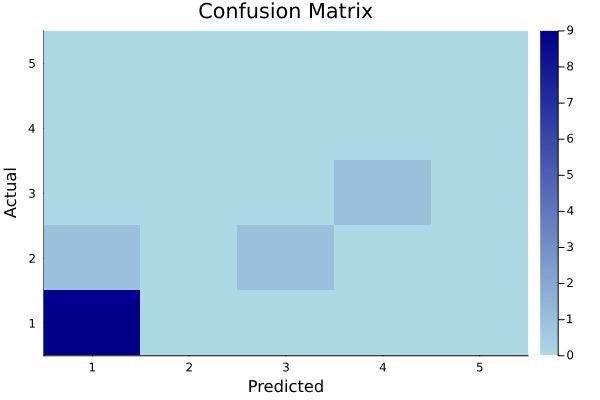

Eğitim seti doğruluğu (2023): 0.999390243902439
Validation seti doğruluğu (2023): 0.8235294117647058
[14 3 0 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0; 0 0 0 0 0]


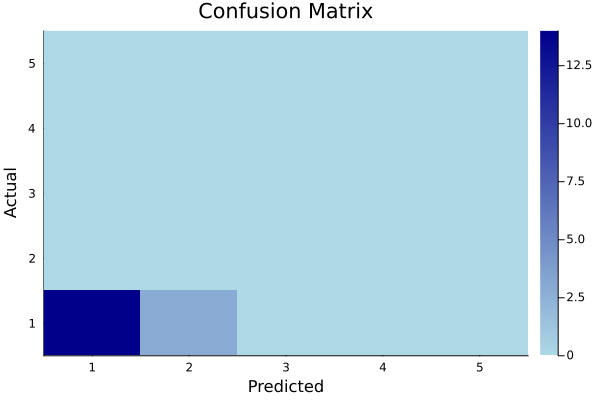

In [129]:
using MLBase
# Modelleme için sözlük
models = Dict{Int, DecisionTreeClassifier}()

function plot_confusion_matrix(conf_matrix, classes)
    heatmap(classes, classes, conf_matrix, c=:blues, xlabel="Predicted", ylabel="Actual", title="Confusion Matrix", fmt=:text)
end

class_labels = [string(i) for i in 1:5]

# Tüm yıllar için modelleme
for year = start_year:end_year
    # Eğitim setini seç
    current_train_set = train_sets[Symbol("train_set_", year)]

    # Öznitelikleri ve hedef değişkeni belirle
    current_train_features = select(current_train_set, Not(:Classification_Int, :Title))
    current_train_target = current_train_set[:, :Classification_Int]

    # Random Forest modelini tanımla
    model = DecisionTreeClassifier(rng=42)

    # Modeli eğit
    DecisionTree.fit!(model, Matrix(current_train_features), vec(current_train_target))

    # Modeli sözlüğe ekle
    models[year] = model

    # Eğitim seti üzerinde modelin performansını değerlendir
    train_predictions = DecisionTree.predict(model, Matrix(current_train_features))
    println("Eğitim seti doğruluğu (", year, "): ", mean(current_train_target .== train_predictions))

    # Validation seti için modeli değerlendir
    current_val_set = val_sets[Symbol("val_set_", year)]
    current_val_features = select(current_val_set, Not(:Classification_Int, :Title))
    current_val_target = current_val_set[:, :Classification_Int]
    val_predictions = DecisionTree.predict(model, Matrix(current_val_features))
    println("Validation seti doğruluğu (", year, "): ", mean(current_val_target .== val_predictions))
    
    C = confusmat(5, current_val_target, val_predictions)
    println(C)
    
    plot_confusion_matrix(C,class_labels)
    display(Plots.plot!())
end


In [74]:
unique_release_years = unique(test_set[:, :Release_Year])
println(unique_release_years)



[2011, 2021, 2007, 2010, 2014, 2002, 2005, 2013, 2015, 2018, 2020, 2016, 2022, 2008, 2017, 2000, 2023, 2019, 2003, 2009, 2006, 1998, 2001, 2012, 2004, 1999]


In [75]:
# Modelleme için sözlük
models = Dict{Int, DecisionTreeClassifier}()

# Tüm yıllar için modelleme
for year = start_year:end_year
    # Eğitim setini seç
    current_train_set = train_sets[Symbol("train_set_", year)]

    # Öznitelikleri ve hedef değişkeni belirle
    current_train_features = select(current_train_set, Not(:Classification_Int, :Title))
    current_train_target = current_train_set[:, :Classification_Int]

    # Random Forest modelini tanımla
    model = DecisionTreeClassifier(rng=42)

    # Modeli eğit
    DecisionTree.fit!(model, Matrix(current_train_features), vec(current_train_target))

    # Modeli sözlüğe ekle
    models[year] = model

         # Test seti üzerinde modelin performansını değerlendir
    current_test_set = test_sets[Symbol("test_set_", year)]
    current_test_features = select(current_test_set, Not(:Title))
    test_predictions = DecisionTree.predict(model, Matrix(current_test_features))

    # Tahminleri ekrana yazdır
    println("Test seti tahminleri (", year, "): ", test_predictions)




end


Test seti tahminleri (1998): [1, 1]
Test seti tahminleri (1999): [2]
Test seti tahminleri (2000): [1, 1]
Test seti tahminleri (2001): [1, 1, 1, 2]
Test seti tahminleri (2002): [1, 1, 3, 1, 2]
Test seti tahminleri (2003): [1, 1, 2, 1, 1, 1]
Test seti tahminleri (2004): [1, 2, 1, 1]
Test seti tahminleri (2005): [1, 2, 2, 1, 1, 2, 1]
Test seti tahminleri (2006): [1, 1]
Test seti tahminleri (2007): [1, 2, 2, 1, 1, 1, 1, 1, 1]
Test seti tahminleri (2008): [1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1]
Test seti tahminleri (2009): [1, 1, 1]
Test seti tahminleri (2010): [1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1, 1]
Test seti tahminleri (2011): [1, 1, 2, 1, 1, 3, 1, 1, 1, 1]
Test seti tahminleri (2012): [1, 1, 1, 1]
Test seti tahminleri (2013): [2, 3, 1, 1, 1, 1, 1, 1, 2, 1]
Test seti tahminleri (2014): [2, 1, 2, 1, 1, 1, 2, 1]
Test seti tahminleri (2015): [2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2]
Test seti tahminleri (2016): [1, 1, 1, 2]
Test seti tahminleri (2017): [1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1]
Test seti tahmin